# Home Credit

* 참고 Notebook : https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

## 배경이해

Home Credit 은 1997년 체코에서 설립된 국제적인 비은행 금융 기관입니다. 14개국에서 운영되고 있으며, 신용기록이 적거나 전혀 없는 사람들을 대상으로한 대출에 중점을 두고있습니다. 보통 신용기록이 없는 사람들은 안정적인 금융권에서 대출을 받는데 어려움이 많아 고리의 대출을 이용하게 됩니다. Home Credit에서는 다양한 대체 데이터(통신 혹은 거래정보 등)와 다양한 통계 및 머신러닝 기법을 활용해 고객의 상환 능력을 예측하여 이런 사람들에게도 긍정적인 대출 경험을 제공하려 노력하고 있습니다.<br>

Home Credit은 본 대회를 통해 상환할 수 있는 고객의 대출 신청을 거절하지 않고, 고객이 충분히 상환할 수 있는 적절한 원금, 만기 및 상환일정을 예측하는 등 데이터의 잠재력을 끌어낼 수 있기를 바란다고 합니다.<br>

* application_{train|test}.csv : home credit의 각 대출 application 정보가 있다. 모든 대출에는 자체 행이 있고 SK_ID_CURR로 식별된다. Train 데이터는 대출이 상환되었거나 0, 상환되지 않는 (1)이 제공된다.
<br>
* previous_application.csv : application data에 대출이 있는 고객의 previous application for loan, 여러 개의 이전 대출을 가질 수 있다.
<br>
* bureau.csv : 다른 금융 기관의 고객의 이전 신용 데이터, 각 이전 신용은 자체적인 row가 있지만 applicaion data에서 하나의 대출은 여러개의 previous credit을 가질 수 있다.
<br>
* bureau_balance.csv : 위 bureau.csv의 월별 데이터 이다. 각 행은 한 달을 말하고 매월 한 행씩 여러행을 가진다.
<br>
* POS_CASH_balance.csv : 고객의 point of sale, 현금 대출에 대한 월별 데이터, 각 행은 한 달을 뜻하고 하나의 대출은 여러 행을 가질 수 있다.
<br>
* credit_card_balance.csv : 신용카드 위협 데이터, 각 행은 신용카드의 잔액 한 달 데이터를 뜻한다.
<br>
* installments_payments.csv : 이전 대출에서 payment 히스토리.
<br>
* HomeCredit_columns_description.csv : 이 파일은 다양한 데이터 파일의 열에 대한 설명을 포함하고 있다.

In [1]:
# File system manangement
import os
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# Data Load

In [2]:
print(os.listdir("home_credit_data/"))

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [3]:
train = pd.read_csv("home_credit_data/application_train.csv")
test = pd.read_csv("home_credit_data/application_test.csv")
print(train.shape)
print(test.shape)

(307511, 122)
(48744, 121)


# Null Check

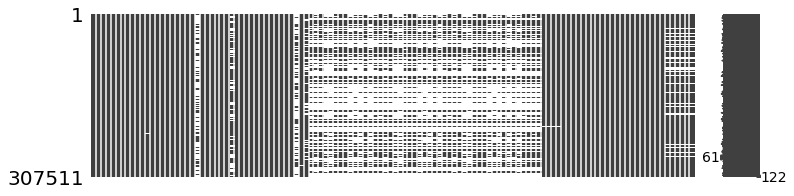

In [4]:
msno.matrix(train, figsize=(12, 3))

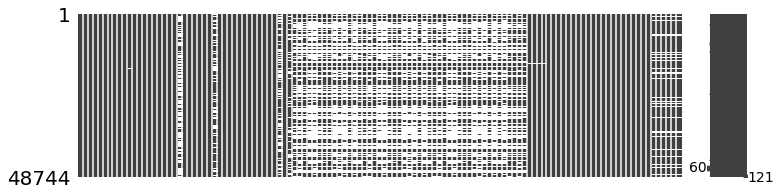

In [5]:
msno.matrix(test, figsize=(12, 3))

In [6]:
train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
test.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [8]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Column Types 

In [10]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
train.select_dtypes("object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [12]:
# 컬럼 값에 들어가 있는 값들의 개수
train.select_dtypes("object").apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

# Visualization

### -TARGET

In [13]:
train["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

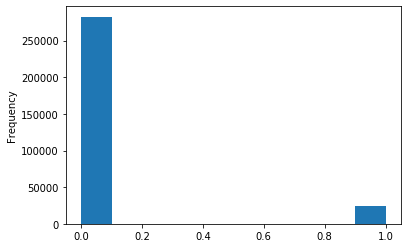

In [14]:
train["TARGET"].astype(int).plot.hist()

In [15]:
# 값이 없는 것들을 확인
def missing_values_table(df):
    
    mis_val = df.isnull().sum()
    
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    mis_val_table_rename_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : "% of Total Values"})
    
    mis_val_table_rename_columns = mis_val_table_rename_columns[
        mis_val_table_rename_columns.iloc[:,1] != 0].sort_values("% of Total Values", ascending=False).round(1)
    
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
         "There are " + str(mis_val_table_rename_columns.shape[0]) + " columns that have missing value.")
    
    return mis_val_table_rename_columns 

missing_values = missing_values_table(train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing value.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


# One Hot Encoding

In [16]:
le = LabelEncoder()
le_count = 0
name = []

for col in train:
    if train[col].dtype == "object":
        if len(list(train[col].unique())) <= 2:
            le.fit(train[col])
            
            train[col] = le.transform(train[col])
            test[col] = le.transform(test[col])
            
            name.append(col)
            le_count += 1
            
print("%d columns were label encoded." % le_count)    
print(train.shape)
print(test.shape)
train[name].head()

3 columns were label encoded.
(307511, 122)
(48744, 121)


,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,0,0,1
1,0,0,0
2,1,1,1
3,0,0,1
4,0,0,1


In [17]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(train.shape)
print(test.shape)

(307511, 243)
(48744, 239)


In [19]:
# train 데이터와 test 데이터 갯수 맞춰주기
train_labels = train["TARGET"]

train, test = train.align(test, join="inner", axis=1)

train["TARGET"] = train_labels

print(train.shape)
print(test.shape)

(307511, 240)
(48744, 239)
